# CMPE 255: Data Mining Project
# Smart Energy Advisor: A Data-Driven Approach to Household Energy Conservation


### Importing Libraries

In [2]:
import pandas as pd
import zipfile
import os


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Loading Dataset and Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv("/content/drive/Shareddrives/CMPE_255_Dataset/household_power_consumption.txt", sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values=['?'])

df.dropna(inplace=True)

In [6]:
def add_time_features(df):
    df['year'] = df['Datetime'].dt.year
    df['month'] = df['Datetime'].dt.month
    df['day'] = df['Datetime'].dt.day
    df['hour'] = df['Datetime'].dt.hour
    df['day_of_week'] = df['Datetime'].dt.dayofweek
    df['weekend'] = (df['day_of_week'] >= 5).astype(int)
    return df

# Apply feature engineering to the dataset
df = add_time_features(df)

### Exploratory Data Analysis

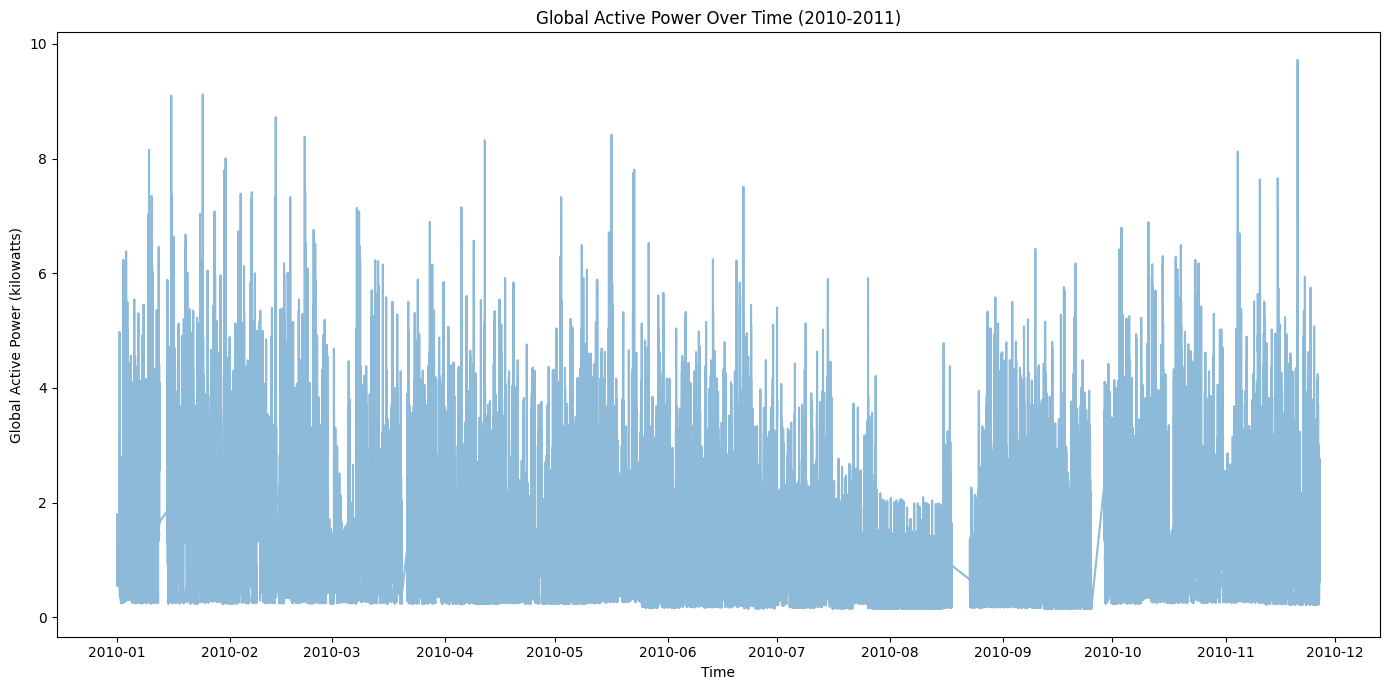

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the timeframe of 2010 to 2011
df_2010_2011 = df[(df['Datetime'] >= '2010-01-01') & (df['Datetime'] <= '2011-12-31')]

# Now plot the filtered data
plt.figure(figsize=(14, 7))
plt.plot(df_2010_2011['Datetime'], df_2010_2011['Global_active_power'], alpha=0.5)
plt.title('Global Active Power Over Time (2010-2011)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
#plt.savefig('global_active_power_2010_2011.png')
plt.show()
plt.close()


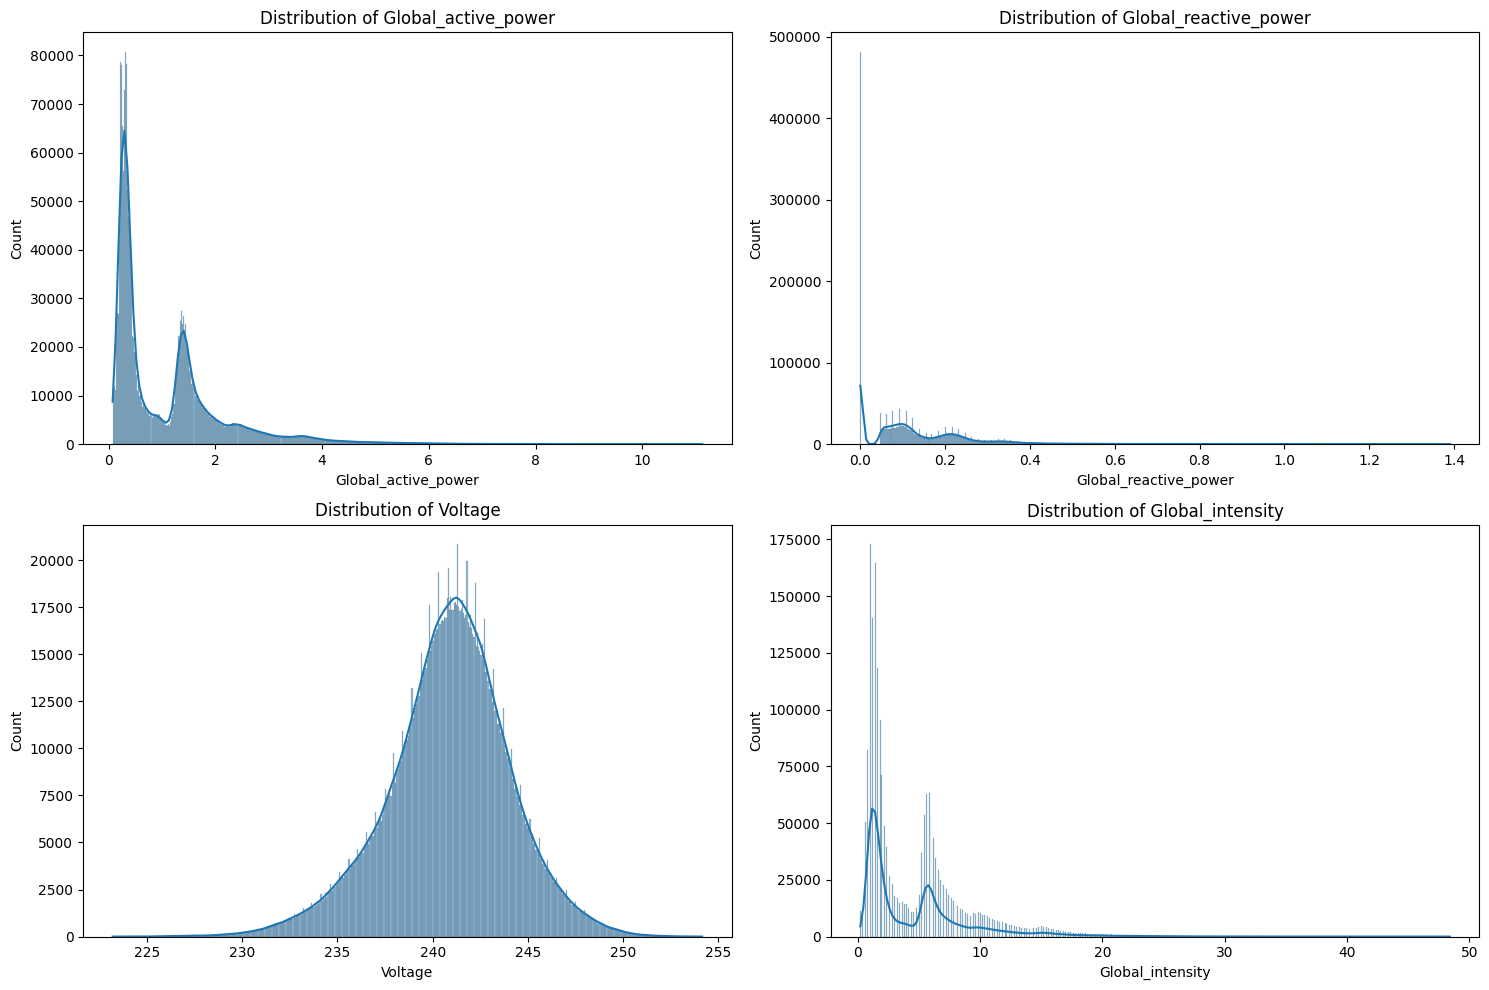

In [8]:
# EDA: Distribution of variables
numerical_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
#plt.savefig('distribution_of_variables.png')
plt.show()
plt.close()



### Clustering

-Hardi

### Time - series Forecasting  

-Anuraghav

### Classification

-Shireen
